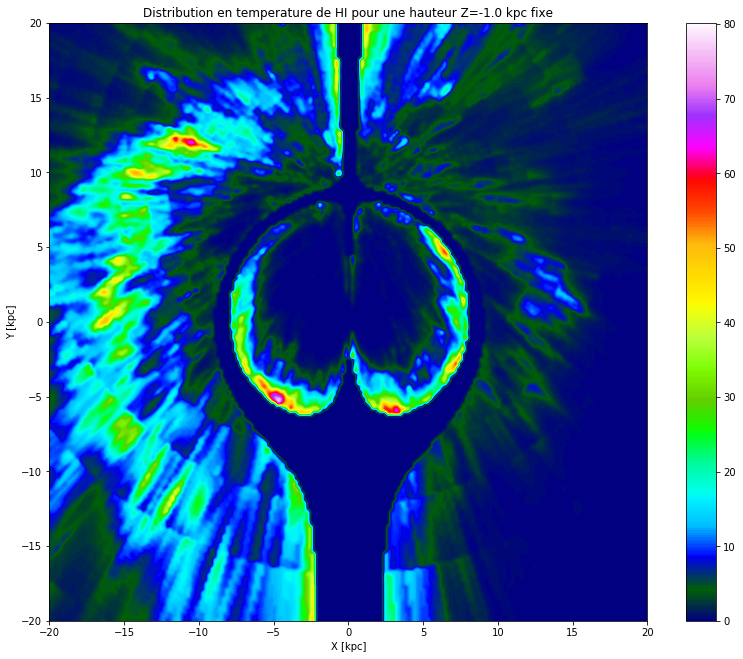

In [1]:
from main_functions import *
from astropy.io import fits

%matplotlib inline

hdulist=fits.open("../Data/lab.fit")
prihdr=hdulist[0].header
data2=hdulist[0].data
#
xmin=-20. #borne inferieure de l'intervalle sur l'axe des x
xmax=20. #borne superieure
xincr=0.2 #pas sur l'axe des x
ymin=-20. #borne inferieure de l'intervalle sur l'axe des y
ymax=20. #borne superieure
yincr=0.2 #pas sur l'axe des y
Z=-1. #hauteur du plan dans lequel on veut voir la galaxie
dV=1.
#
x=arange(xmin,xmax,xincr) #ici xmin et xmax sont les valeurs minimale et maximale de l'intervalle sur lequel on veut plot et xincr le pas entre chaque points
y=arange(ymin,ymax,yincr) #parei que pour x
X,Y = np.meshgrid(x,y)
R=np.sqrt(X**2+Y**2) #calcul des valeurs de R pour chaque X et Y
TETA=np.arctan2(Y,X)+pi/2 #calcul des valeurs de TETA pour chaque X et Y
#
A=milkyway_z(xmin,xmax,xincr,ymin,ymax,yincr,Z,dV,data2,prihdr) #appel de la fonction qui donne un plot du plan orthogonal a l'axe des z
#
#plt.pcolormesh(X,Y,A) # si on ne veut pas d'interpolation
plt.figure(1,figsize=(14,11))
plt.imshow(A, interpolation='bicubic', origin='lower', extent=[xmin,xmax,ymin,ymax], cmap='gist_ncar') # plot avec interpolation
plt.colorbar()
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.title('Distribution en temperature de HI pour une hauteur Z='+str(Z)+' kpc fixe')
plt.show()